In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Car_IA/car_data.csv')

In [7]:
tasa_conversion = 1.07
df['Price'] = df['Price'] * tasa_conversion
print("\nPrecios en dólares:")
print(df['Price'])


Precios en dólares:
0           513.60
1         19581.00
2         10486.00
3          1605.00
4          3852.00
            ...   
354364        0.00
354365     2354.00
354366     1282.93
354367     9844.00
354368     3638.00
Name: Price, Length: 354369, dtype: float64


In [8]:
df.to_csv('car_data_v2.csv', index=False)

In [9]:
data = pd.read_csv('car_data_v2.csv')
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,513.6,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,19581.0,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,10486.0,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1605.0,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3852.0,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [10]:
# Tamaño de filas y columnas
df.shape

(354369, 16)

In [11]:
# Datos cargados correctamente
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,513.6,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,19581.0,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,10486.0,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1605.0,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3852.0,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [12]:
# Ultimas lineas del dataset
df.tail()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
354364,21/03/2016 09:50,0.00,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2354.00,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1282.93,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9844.00,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15
354368,20/03/2016 19:41,3638.00,wagon,2002,manual,100,golf,150000,6,gasoline,volkswagen,NaN,20/03/2016 00:00,0,40764,24/03/2016 12:45


In [13]:
# Que tipo de valores tengo Faltan datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DateCrawled        354369 non-null  object 
 1   Price              354369 non-null  float64
 2   VehicleType        316879 non-null  object 
 3   RegistrationYear   354369 non-null  int64  
 4   Gearbox            334536 non-null  object 
 5   Power              354369 non-null  int64  
 6   Model              334664 non-null  object 
 7   Mileage            354369 non-null  int64  
 8   RegistrationMonth  354369 non-null  int64  
 9   FuelType           321474 non-null  object 
 10  Brand              354369 non-null  object 
 11  NotRepaired        283215 non-null  object 
 12  DateCreated        354369 non-null  object 
 13  NumberOfPictures   354369 non-null  int64  
 14  PostalCode         354369 non-null  int64  
 15  LastSeen           354369 non-null  object 
dtypes:

In [14]:
# Datos faltantes
df.isna().sum()

,0
DateCrawled,0
Price,0
VehicleType,37490
RegistrationYear,0
Gearbox,19833
Power,0
Model,19705
Mileage,0
RegistrationMonth,0
FuelType,32895


In [15]:
# Nos muestra el numero total de filas que estan repetidas
print(f'Número de valores duplicados: {df.duplicated().sum()}')

Número de valores duplicados: 262


El dataset cuenta con 354369 filas/observaciones y 16 columnas, de las cuales 15 corresponden a las características y una al objetivo de nuestro modelo, que en este caso correspondría al precio del vehículo.

VISUALIZACION DATOS

In [16]:
#Almacenamos a las variables discretas en la variable categorical_data
categorical_data = df[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']]

# Revisamos los valores únicos de cada columna con el método nunique
for col in categorical_data:
    print(f'{col}: {categorical_data[col].nunique()}')

VehicleType: 8
Gearbox: 2
Model: 250
FuelType: 7
Brand: 40
NotRepaired: 2


Ayudara a saber cuantos valores unicos hay en una columna, tambien decidir si convertir esa columna a numeros y tambien identificar si hay valores mal escritos o inconsistencias

SUBPLOTS permite dibujar varios graficos juntos en una sola figura y verlos organizados y compararlos facilmente, evitar que se encimen

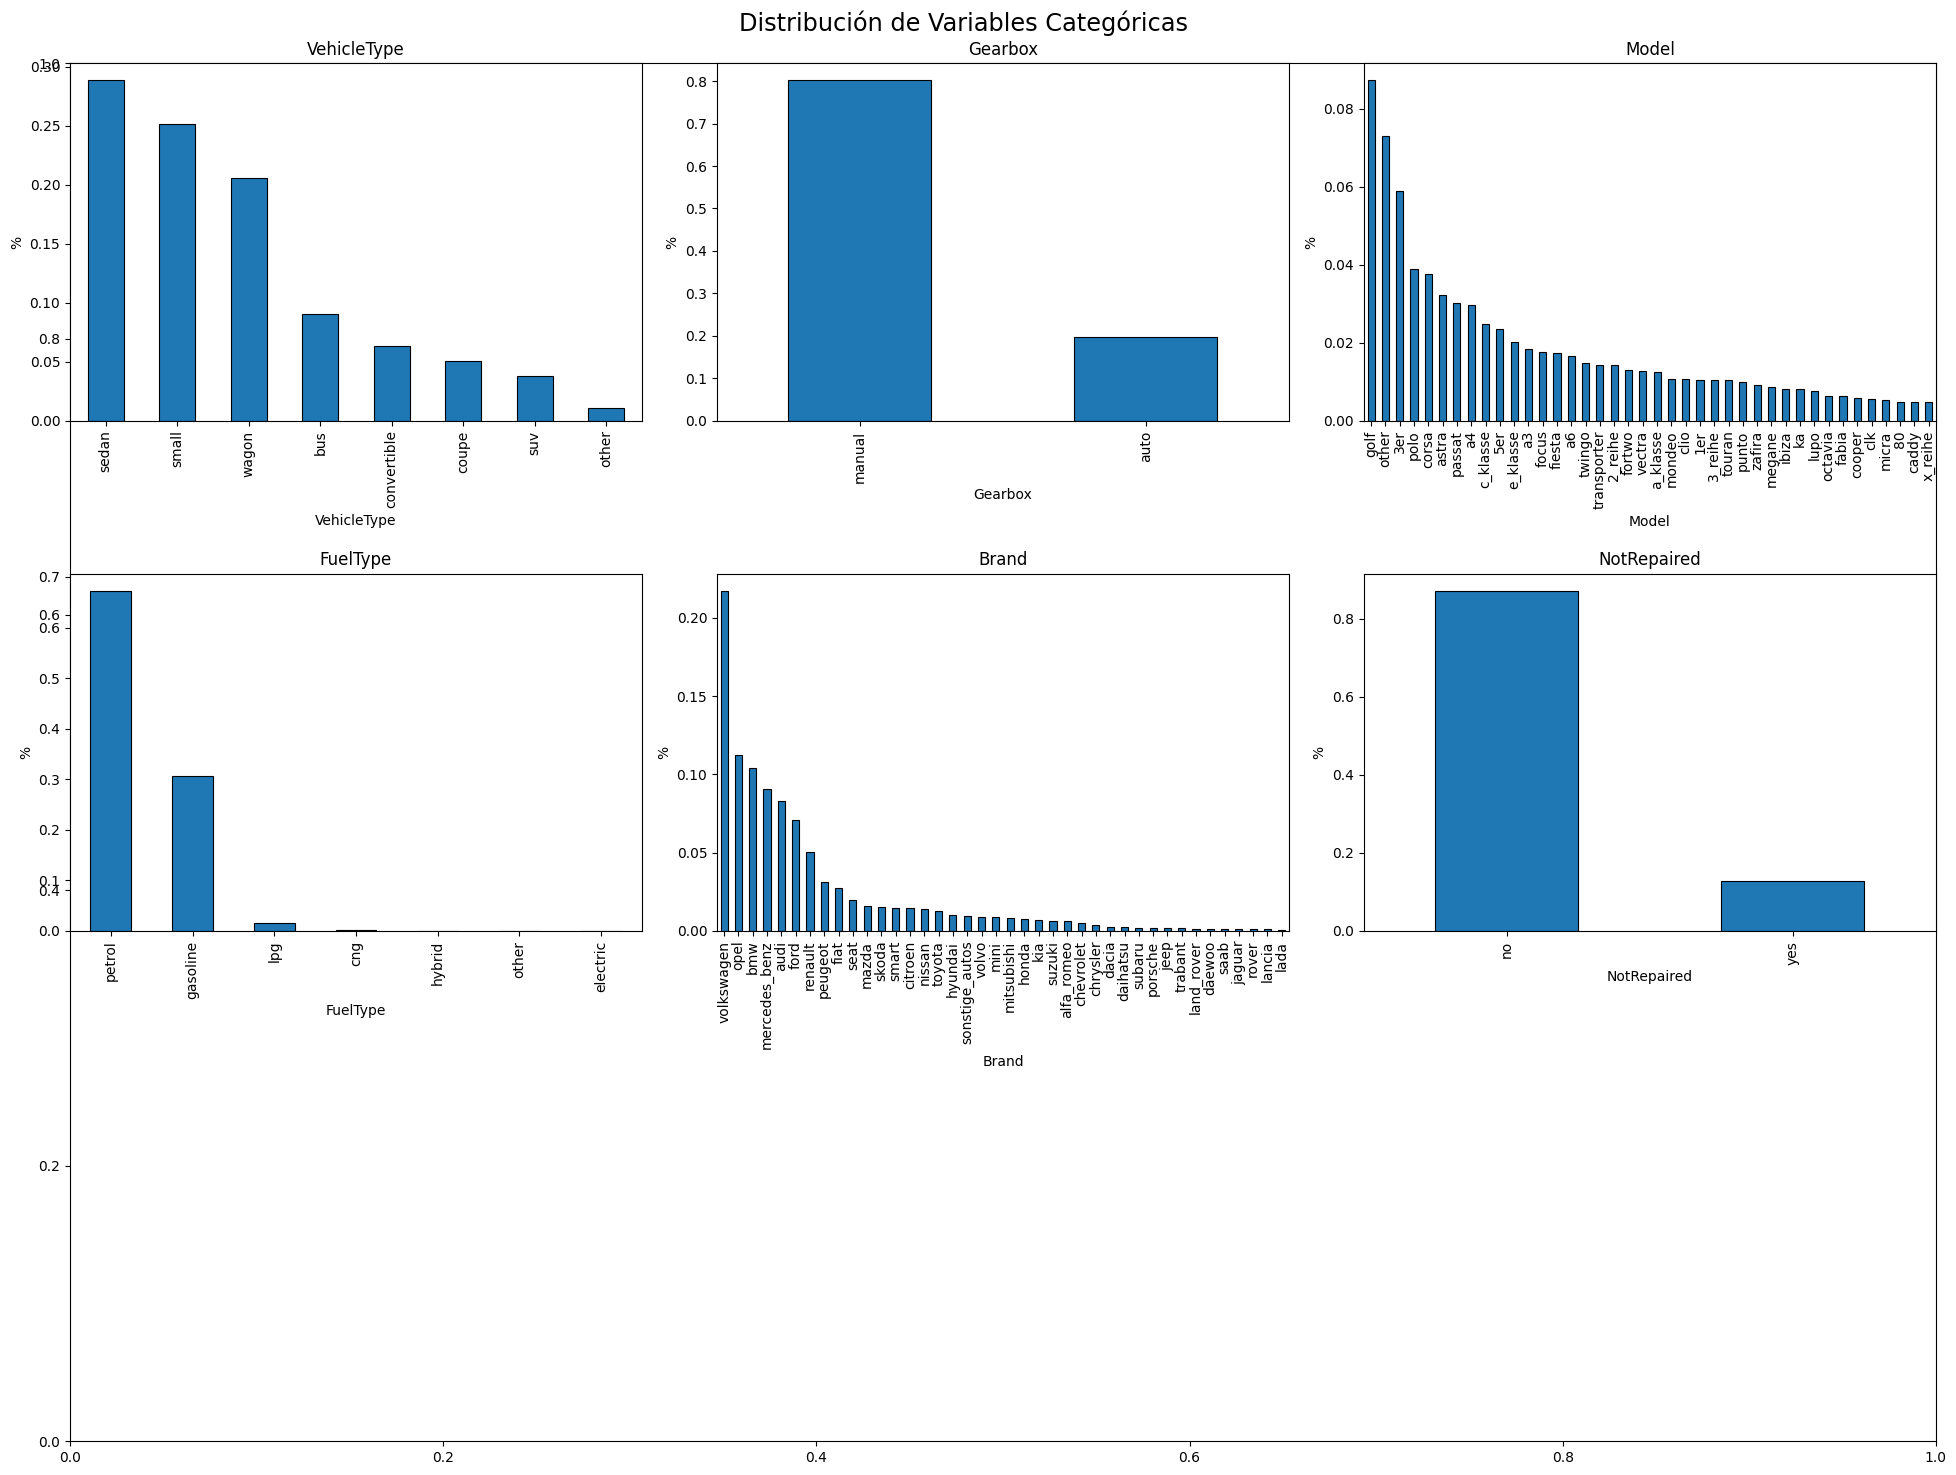

In [17]:
# Establecemos el número de filas y columnas para nuestros subplots
a = 3 # número de filas
b = 3 # número de columnas
c = 1 # inicialización del conteo de plots

# Establecemos el tamaño de nuestra figura de subplots
fig = plt.subplots(figsize=(20, 15))

# Construimos un bucle for que iterará por cada columna categórica y devolverá un gráfico de barras
for i in categorical_data:
    plt.subplot(a, b, c)
    plt.title(i)
    plt.ylabel('%')
    df[i].value_counts(normalize=True).head(40).plot(kind='bar', title=i, rot=90, edgecolor = 'black', linewidth = 0.8)
    c = c + 1

plt.suptitle('Distribución de Variables Categóricas', fontsize='xx-large')
plt.tight_layout()
plt.show()

In [18]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.00000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4725.82275,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4830.14961,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.00000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1123.50000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2889.00000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6848.00000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,21400.00000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


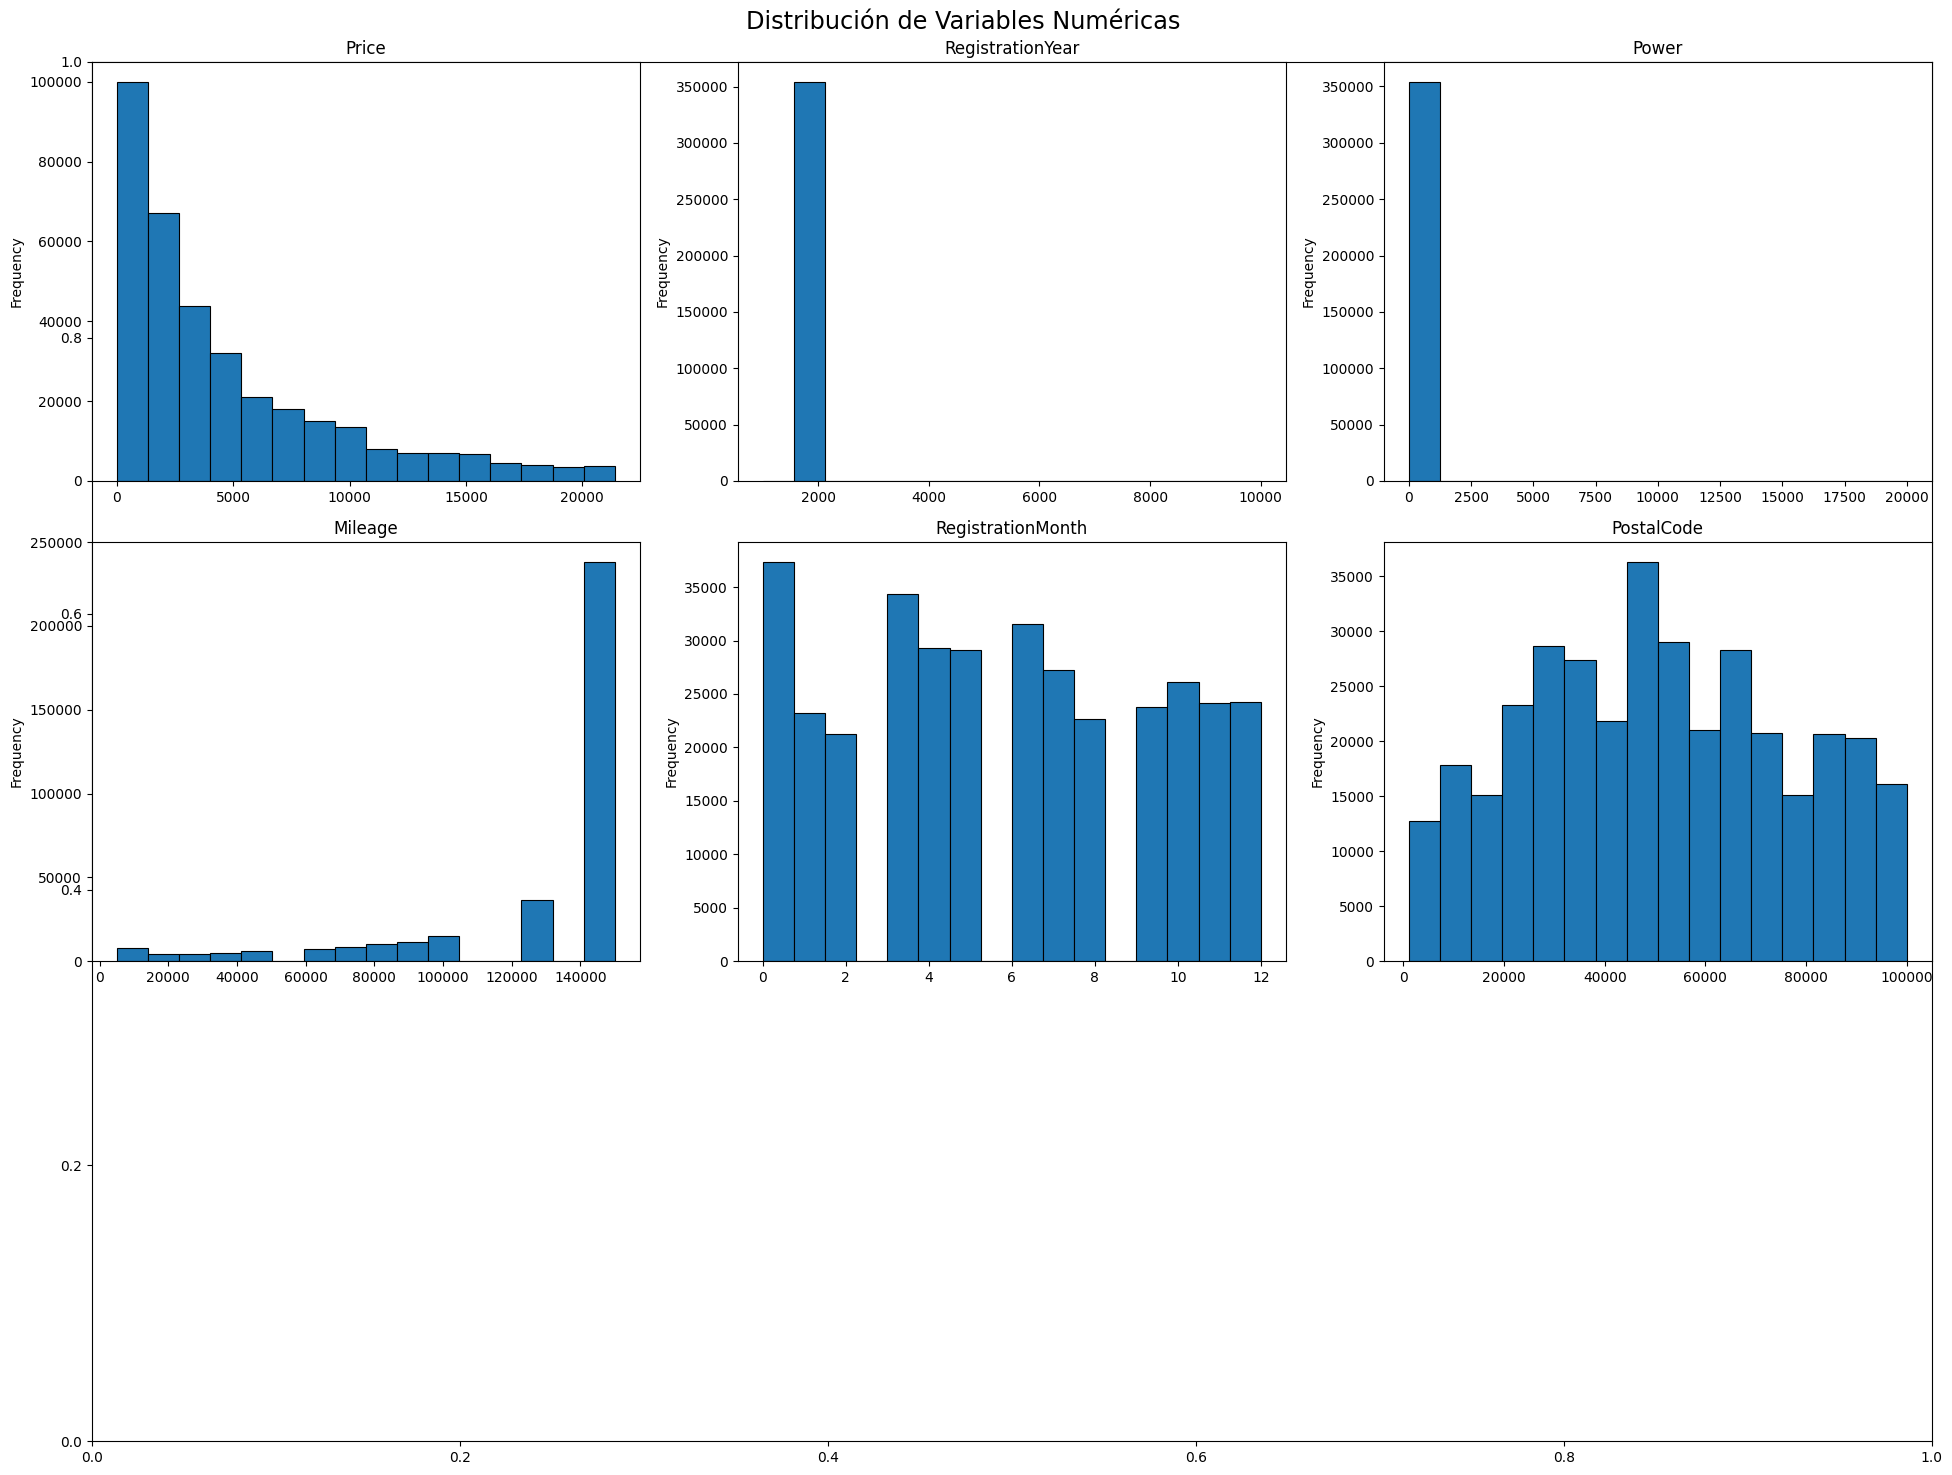

In [19]:
# Almacenamos a las variables continuas en la variable numerical_data
numerical_data= ['Price', 'RegistrationYear', 'Power', 'Mileage', 'RegistrationMonth', 'PostalCode']

# Establecemos el número de filas y columnas para nuestros subplots
a = 3 # número de filas
b = 3 # número de columnas
c = 1 # inicialización del conteo de plots

# Establecemos el tamaño de nuestra figura de subplots
fig = plt.subplots(figsize=(20, 15))

# Construimos un bucle for que iterará por cada columna numérica y devolverá un histograma
for i in numerical_data:
    plt.subplot(a, b, c)
    plt.title(i)
    df[i].plot(kind='hist', title=i, bins=16, edgecolor = 'black', linewidth = 0.8)
    c = c + 1

plt.suptitle('Distribución de Variables Numéricas', fontsize='xx-large')
plt.tight_layout()
plt.show()

In [20]:
# Solo si existe la columna
if 'NumberOfPictures' in df.columns:
    df = df.drop(['NumberOfPictures'], axis=1)


In [21]:
print(df.select_dtypes(include=['number']).columns)

Index(['Price', 'RegistrationYear', 'Power', 'Mileage', 'RegistrationMonth',
       'PostalCode'],
      dtype='object')


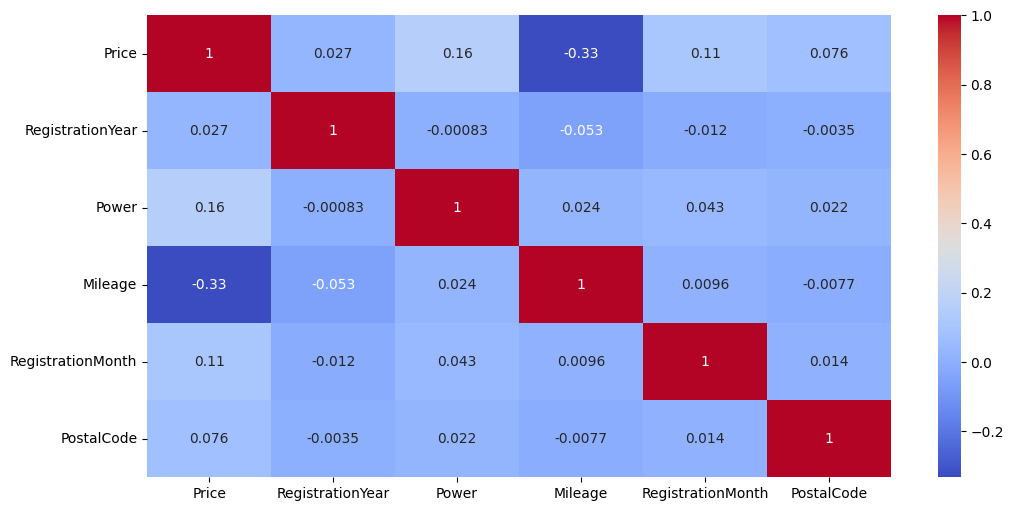

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


VALORES DUPLICADOS

En la exploracion de datos se observaron valores duplicados, asi que mejor lo eliminamos

In [23]:
df = df.drop_duplicates().reset_index(drop=True)

print(f'Número de valores duplicados: {df.duplicated().sum()} | Número de filas dataset: {df.shape[0]}')

Número de valores duplicados: 0 | Número de filas dataset: 354107


Hacemos la correcion de nombrs de columnas
empezamos corrigiendo el nombre de las columnas que se encontraban en mayuscula, las transformaciones en minuscula y separaremos los nombres con mas de dos palabras con un guine bajo.
Para esto utilizamos expresiones regulares y las funciones  `str.replace, str.strip y str.lower.`.

In [24]:
# Cambiamos los nombres a minúsculas y añadimos un guión bajo como separador de palabras.
df.columns = df.columns.str.replace(r'([A-Z])', r'_\1', regex=True).str.strip('_').str.lower()

# Comprobamos los cambios mostrando los nombres de las columnas.
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'postal_code', 'last_seen'],
      dtype='object')

CORRECCION TIPO DE DATOS

Anteriormente vimos como algunos columnas se presentan como tipo objeto asi que mejor la convertimos a tipo datetime

In [25]:
# Guardamos las columnas de fecha en la variable date_columns
date_columns = df[['date_crawled', 'date_created', 'last_seen']]

# Construimos un bucle for que itere por las columnas y las transforme en datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y %H:%M')

# Comprobamos los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354107 entries, 0 to 354106
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354107 non-null  datetime64[ns]
 1   price               354107 non-null  float64       
 2   vehicle_type        316623 non-null  object        
 3   registration_year   354107 non-null  int64         
 4   gearbox             334277 non-null  object        
 5   power               354107 non-null  int64         
 6   model               334406 non-null  object        
 7   mileage             354107 non-null  int64         
 8   registration_month  354107 non-null  int64         
 9   fuel_type           321218 non-null  object        
 10  brand               354107 non-null  object        
 11  not_repaired        282962 non-null  object        
 12  date_created        354107 non-null  datetime64[ns]
 13  postal_code         354107 no

VALORES AUSENTES

Se registraron cinco columnas con valores ausentes, vamos a calcular el porcentaje que representan en nuestro dataset

In [26]:
nan_count = df.isna().sum()
nan_percent = 100 * df.isna().sum() / len(df)

nan_table = pd.concat([nan_count, nan_percent], axis=1)
nan_table.columns = ['Valores Ausentes', '% Ausentes']

nan_table[nan_table.iloc[:,1] != 0]

,Valores Ausentes,% Ausentes
vehicle_type,37484,10.585501
gearbox,19830,5.600002
model,19701,5.563573
fuel_type,32889,9.287871
not_repaired,71145,20.091385


VALORES AUSENTES (VEHICLE_TYPE)

In [28]:
# Analizamos la distribución de nuestros datos
df['vehicle_type'].value_counts(dropna=False, normalize=True)

,proportion
vehicle_type,
sedan,0.258111
small,0.225223
wagon,0.183885
NaN,0.105855
bus,0.081196
convertible,0.056988
coupe,0.045599
suv,0.033863
other,0.009280


rellenar valores faltantes (NaN) en esa columna basándose en otros datos de cada fila, como la marca, el modelo o el tipo de combustible.

In [31]:
# Reemplazamos los errores por la moda de la columna
df['vehicle_type'] = df['vehicle_type'].replace('Error', 'unknown')

#Cambia todos los valores 'Error' de la columna vehicle_type por 'unknown'. Esto es útil porque 'Error' era un marcador temporal para los datos que no se pudieron rellenar con la función fill_vehicle_type.
#Reemplazarlo por 'unknown' los deja listos para trabajar en modelos de machine learning, que no funcionan bien con valores como 'Error'.

# Comprobamos los cambios realizados
print('Número de errores en vehicle_type:', len(df[df['vehicle_type'] == 'Error']))
print('Valores únicos en vehicle_type:')
print(df['vehicle_type'].value_counts(dropna=False, normalize=True))

Número de errores en vehicle_type: 0
Valores únicos en vehicle_type:
vehicle_type
sedan          0.258111
small          0.225223
wagon          0.183885
NaN            0.105855
bus            0.081196
convertible    0.056988
coupe          0.045599
suv            0.033863
other          0.009280
Name: proportion, dtype: float64


In [32]:
# Reemplazamos petrol por gasoline
df['fuel_type'] = df['fuel_type'].replace('petrol', 'gasoline')

# Busca todos los valores PETROL en la columna fuel_type y los cambia por GASOLINE
# Porque PETROL Y GASOLINE significan lo mismo, pero puede que el dataset tenga ambos por error o mezcla de fuentes

# Comprobamos la nueva distribución de los datos
df['fuel_type'].value_counts(dropna=False, normalize=True)

,proportion
fuel_type,
gasoline,0.889050
NaN,0.092879
lpg,0.014987
cng,0.001596
hybrid,0.000658
other,0.000576
electric,0.000254


aplica la función (fill_fuel_type) a todo el DataFrame df para rellenar los valores faltantes en la columna fuel_type, y luego verifica cuántos no se pudieron rellenar.

In [35]:
# Reemplazamos los errores por la moda de la columna
df['fuel_type'] = df['fuel_type'].replace('Error', 'unknown')

# Comprobamos los cambios realizados
print('Número de errores en fuel_type:', len(df[df['fuel_type'] == 'Error']))
print('Valores únicos en fuel_type:')
print(df['fuel_type'].value_counts(dropna=False, normalize=True))

Número de errores en fuel_type: 0
Valores únicos en fuel_type:
fuel_type
gasoline    0.889050
NaN         0.092879
lpg         0.014987
cng         0.001596
hybrid      0.000658
other       0.000576
electric    0.000254
Name: proportion, dtype: float64


In [37]:
df['model'] = df['model'].replace('Error', 'unknown')

print('Número de errores en model:', len(df[df['model'] == 'Error']))

Número de errores en model: 0


El hecho de que un vehículo se encuentre reparado o no depende de cada vendedor, por lo que los valores ausentes de esta columna no son algo que se pueda rellenar fácilmente en función de otra variable. Podríamos rellenar estos valores con una nueva categoría, pero esta vez crearemos un modelo de machine learning que prediga el estado de un vehículo en función de todas las características del dataset.

Empezaremos transformando esta característica categórica en una característica numérica, para esto crearemos un diccionario y posteriomente utilizaremos la función map para reemplazar no = 0 y yes = 1.

In [38]:
# Creamos un diccionario que guarde las equivalencias numéricas de yes y no
not_repaired_dict = {'no': 0, 'yes': 1}

# Utilizamos la función map a la columna not_repaired
df['not_repaired'] = df['not_repaired'].map(not_repaired_dict)

# Comprobamos los cambios
df['not_repaired'].value_counts(dropna=False, normalize=True)

,proportion
not_repaired,
0.0,0.697323
NaN,0.200914
1.0,0.101763


verificamos que no existan valores ausentes en nuestro dataset.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354107 entries, 0 to 354106
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354107 non-null  datetime64[ns]
 1   price               354107 non-null  float64       
 2   vehicle_type        316623 non-null  object        
 3   registration_year   354107 non-null  int64         
 4   gearbox             334277 non-null  object        
 5   power               354107 non-null  int64         
 6   model               334406 non-null  object        
 7   mileage             354107 non-null  int64         
 8   registration_month  354107 non-null  int64         
 9   fuel_type           321218 non-null  object        
 10  brand               354107 non-null  object        
 11  not_repaired        282962 non-null  float64       
 12  date_created        354107 non-null  datetime64[ns]
 13  postal_code         354107 no

In [ ]:
#VALORES ATIPICOS Y ARTEFACTOS

realizar una exploración inicial de datos, se observaron valores inusuales en algunas columnas del dataset: price, registration_year, power, registration_month. Vamos a analizar cada uno de estos valores y decidir como procesarlos. Vamos a trazar diagramas de caja que nos permitan visualizar aquellos valores atípicos e inconsistentes en nuestro dataset, para esto crearemos la función boxplot_function.

In [40]:
def boxplot_function(df, column, ylim=(0,0)):
    """
    Devuelve un diagrama de cajas con sus rangos intercuartílicos

    :param df: nombre del dataset
    :param size: nombre de la columna como string
    :param seed: límites del eje y del gráfico

    """
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR = Q3 - Q1

    df.boxplot(column)
    plt.ylim(ylim)
    plt.hlines(y=[(Q1-1.5*IQR),(Q3+1.5*IQR)], xmin=0.9, xmax=1.1, color='red')
    plt.show()

VALORES ATIPICOS

Apliquemos la función boxplot_function a la columna registration_year y establezcamos las fechas en la que se registraron la mayoría de usuarios.

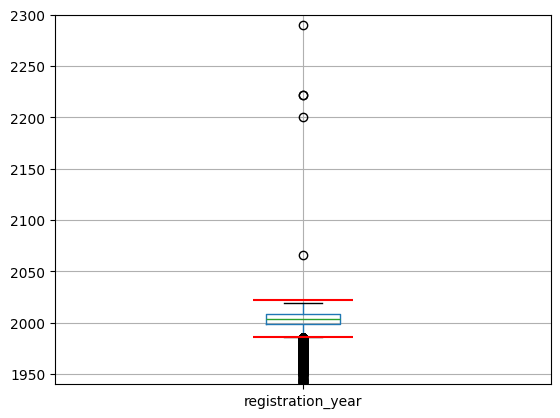

In [41]:
boxplot_function(df, 'registration_year', (1940, 2300))

In [42]:
print(f'''Fecha más antigua de registro: {df['date_created'].min()}
Fecha más reciente de registro: {df['date_created'].max()}
Número de años que abarcan los datos: {df['date_created'].dt.year.max() - df['date_created'].dt.year.min()}''')

Fecha más antigua de registro: 2014-03-10 00:00:00
Fecha más reciente de registro: 2016-04-07 00:00:00
Número de años que abarcan los datos: 2


En el diagrama que observamos de cajas podemos observar valores atípicos con años de matriculación por encima del año 2060 y por debajo de 1900. Considerando que el auto fue inventado en el año de 1886 y que los registros de datos se encuentran hasta el año 2016. Vamos a considerar solo aquellos datos que se encuentren entre 1900 y 2016. Ya que no podemos reemplazar o predecir el año de matriculación en función de otras variables, filtraremos entonces nuestro dataset en función de estos valores.

In [43]:
# Filtramos nuestro dataset
df_filtered = df.query('1900 <= registration_year <= 2016')

# Comprobamos los cambios
df_filtered['registration_year'].describe()

,registration_year
count,339512.000000
mean,2002.481859
std,7.091857
min,1910.000000
25%,1999.000000
50%,2003.000000
75%,2007.000000
max,2016.000000


In [44]:
print(f'Porcentaje de valores eliminados: {(len(df) - len(df_filtered))*100/len(df)}')
print(f'Tamaño del dataset filtrado en registration_year: {len(df_filtered)}')

Porcentaje de valores eliminados: 4.121635550836329
Tamaño del dataset filtrado en registration_year: 339512


VALORES ATIPICOS (PRICE)


Se registraron valores cero en el precio de venta del vehículo, esto está relacionado con aquellos vendedores que prefieren que el comprador se contacte directamente con ellos al no colocar el precio del vehículo, vamos a aplicar nuestra función boxplot_function a la columna price y observaremos la distribución de los datos para tomar una mejor decisión.

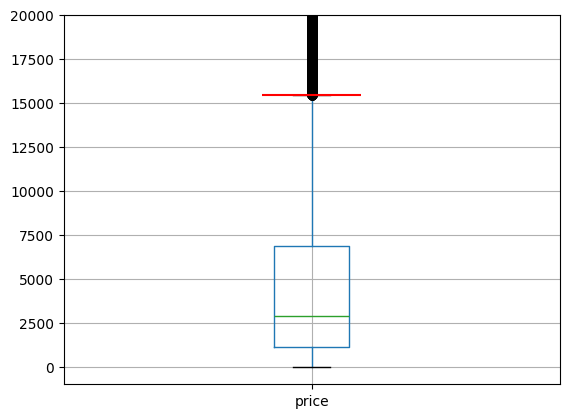

In [45]:
boxplot_function(df, 'price', (-1000, 20000))

En el diagrama de cajas se observa una asimetría positiva, que ya se mencionó anteriormente, la cual está relacionada con el alto número de valores cercanos a cero en nuestro dataset. Debido a que construiremos nuestro modelo para predecir estos valores, vamos a eliminar aquellos vehículos con precios inferiores a 99 dólares, ya que suponen artefactos extraños que afectarán nuestro modelo.

In [46]:
# Filtramos nuestro dataset
df_filtered = df_filtered.query('99 <= price')

# Comprobamos los cambios
df_filtered['price'].describe()

,price
count,327187.000000
mean,4964.106752
std,4864.325049
min,101.650000
25%,1284.000000
50%,3156.500000
75%,7169.000000
max,21400.000000


In [47]:
print(f'Porcentaje de valores eliminados: {(339512 - len(df_filtered))*100/339512}')

Porcentaje de valores eliminados: 3.630210419661161


In [48]:
print(f'Porcentaje de valores anormales eliminados en total: {(len(df) - len(df_filtered))*100/len(df)}')

Porcentaje de valores anormales eliminados en total: 7.602221927270571


VALORES ATIPICOS (POWER)
Ahora analizaremos los valores atípicos en la columna power que registró un valor máximo de 20000cv y valores mínimos de 0cv, los cuales son valores extraños para caballos de vapor en vehículos. Aplicamos nuestra función boxplot_function a esta columna.

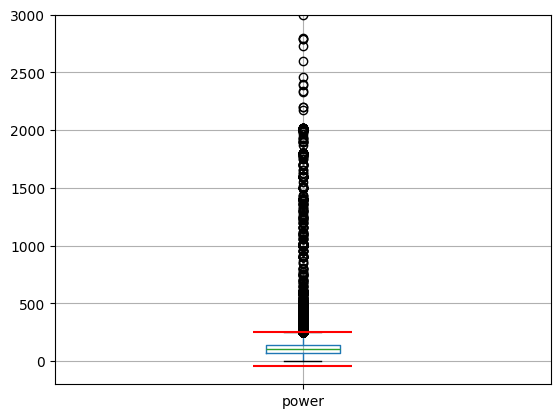

In [49]:
boxplot_function(df, 'power', (-200, 3000))

este diagrama de cajas vemos valores atípicos cercanos a cero y por encima de los 3000cv, si consideramos que el valor mínimo de caballos de vapor para un vehículo es de 60cv y que el máximo puede alcanzar hasta 1800cv. Vamos a rellenar todos los valores de potencia inferior con NaN y luego analizaremos la posibilidad de reemplazarlos en función de otras variables. Mientras que eliminaremos aquellos valores por encima de 2000cv ya que constituyen valores atípicos.

In [50]:
# Filtramos nuestro dataset df_filtered por aquellos valores mayores a 2000cv
df_filtered = df_filtered.query('power <= 2000')

# Convertimos los valores extraños en Nan
df_filtered.loc[df_filtered['power'] < 50, 'power'] = np.nan

# Comprobamos los cambios
df_filtered['power'].describe()

,power
count,290018.000000
mean,123.020775
std,62.829668
min,50.000000
25%,80.000000
50%,115.000000
75%,150.000000
max,2000.000000


In [51]:
nan_power = df_filtered[df_filtered['power'].isna()]
print(f'Porcentaje de valores extraños reemplazados por Nan: {nan_power.shape[0]/len(df_filtered)*100}')
print(f'Porcentaje de valores anormales eliminados en total: {(len(df) - len(df_filtered))*100/len(df)}')
print(f'Tamaño del dataset filtrado: {len(df_filtered)}')

Porcentaje de valores extraños reemplazados por Nan: 11.332799324948178
Porcentaje de valores anormales eliminados en total: 7.630744379523703
Tamaño del dataset filtrado: 327086


observamos un alto porcentaje de artefactos extraños reemplazados por valores NaN, así que vamos a rellenarlos en función del modelo de vehículo.

In [52]:
# Creamos un dataset filtrado sin valores ausentes en power y construimos una tabla dinámica agrupando por model
power_no_missing_values = df_filtered.dropna(subset=['power'])
power_model = power_no_missing_values.pivot_table(index=['model'], values='power', aggfunc='median')

# Creamos la función fill_power
def fill_power(row):
    '''
    Devuelve la mediana en función del modelo del auto, si no es posible devuelve 'Error'

    :param row: fila con la información que requiere ser rellenada
    '''
    model = row['model']
    power = row['power']

    if pd.isna(power):
        try:
            return power_model.loc[model, 'power']
        except:
            return 'Error'
    return power

# Comprobamos que la función trabaje correctamente
row_values = ['100', np.nan]
row_columns = ['model', 'power']
row = pd.Series(data=row_values, index=row_columns)
fill_power(row)

np.float64(133.0)

In [53]:
# Aplicamos la función a nuestro dataset
df_filtered['power'] = df_filtered.apply(fill_power, axis = 1)

In [54]:
# Comprobamos si existen valores que no se rellenaron
df_filtered[df_filtered['power'] == 'Error']

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
160,2016-03-19 19:49:00,535.0,small,1999,manual,Error,NaN,150000,0,gasoline,renault,0.0,2016-03-19,26969,2016-04-01 11:17:00
193,2016-03-27 12:47:00,1284.0,coupe,1990,manual,Error,NaN,150000,0,gasoline,volkswagen,NaN,2016-03-27,83317,2016-04-07 08:17:00
260,2016-04-04 09:49:00,481.5,NaN,2016,manual,Error,NaN,150000,3,gasoline,mitsubishi,0.0,2016-04-04,59302,2016-04-06 11:17:00
306,2016-03-21 14:38:00,214.0,NaN,2009,NaN,Error,NaN,10000,0,NaN,sonstige_autos,NaN,2016-03-21,6493,2016-03-24 02:47:00
308,2016-03-13 13:38:00,1712.0,wagon,1999,manual,Error,NaN,150000,6,gasoline,bmw,0.0,2016-03-13,41199,2016-03-28 12:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353815,2016-03-21 08:36:00,214.0,small,1998,manual,Error,NaN,150000,4,gasoline,volkswagen,1.0,2016-03-21,26382,2016-04-06 02:45:00
353818,2016-04-03 20:37:00,4601.0,small,2008,auto,Error,NaN,150000,3,NaN,honda,NaN,2016-04-03,30627,2016-04-05 21:16:00
353900,2016-03-07 19:51:00,1605.0,NaN,1995,NaN,Error,NaN,150000,0,NaN,volkswagen,NaN,2016-03-07,26789,2016-04-03 11:46:00
354076,2016-03-31 19:52:00,192.6,NaN,1995,NaN,Error,NaN,125000,3,gasoline,opel,NaN,2016-03-31,41470,2016-04-06 14:18:00


Uno de los valores de potencia no fue correctamente rellenado, este corresponde al vehículo Land Rover serie 1. La potencia de esta marca y modelo de vehículo es 50cv, así que rellenaremos este valor NaN con la información consultada.

In [55]:
# Colocamos el valor de potencia correspondiente al modelo del vehículo
df_filtered.loc[df_filtered['power'] == 'Error', 'power'] = 50

# Convertimos power en tipo entero
df_filtered['power'] = df_filtered['power'].astype('int')

# Comprobamos los resultados
print('Número de errores en power:', len(df_filtered[df_filtered['power'] == 'Error']))
print(df_filtered['power'].describe())

Número de errores en power: 0
count    327086.000000
mean        119.921709
std          61.394515
min          50.000000
25%          75.000000
50%         110.000000
75%         145.000000
max        2000.000000
Name: power, dtype: float64


VALORES ATIPICOS (REGISTRATION_MONTH)


Al explorar el dataset inicial nos encontramos con valores cero para el mes de matriculación del vehículo, estos podrían estar relacionados con que el vendedor no proveyó esa información. Así que lo reemplazaremos por la mediana de la columna.

In [56]:
# Verificamos el recuento de valores únicos para registration_month
df_filtered['registration_month'].value_counts(normalize=True)

,proportion
registration_month,
3,0.099497
6,0.090533
0,0.086433
4,0.084140
5,0.083807
7,0.078463
10,0.075546
11,0.070021
12,0.069706


reemplazamos los valores cero con la mediana del mes de matriculacion, y comprobamos los cambios llamando a value_counts.

In [57]:
# Reemplazamos los valores cero por la mediana de la columna
df_filtered['registration_month'] = (df_filtered['registration_month'].replace(0,
                                                                              df_filtered['registration_month'].median())
                                     .astype('int'))

# Comprobamos los cambios realizados
df_filtered['registration_month'].value_counts(normalize=True)

,proportion
registration_month,
6,0.176966
3,0.099497
4,0.084140
5,0.083807
7,0.078463
10,0.075546
11,0.070021
12,0.069706
9,0.069012



Cálculo edad del vehículo

Ahora añadiremos una nueva característica al dataset car_age a partir del año en que se creo el perfil de usuario y el año en que se matriculó el vehículo.

In [58]:
# Calculamos la edad de cada vehículo
df_filtered['car_age'] = df_filtered['date_created'].dt.year - df['registration_year']

# Comprobamos los valores calculados
df_filtered['car_age'].describe()

,car_age
count,327086.000000
mean,13.377127
std,6.864782
min,0.000000
25%,9.000000
50%,13.000000
75%,17.000000
max,106.000000


Dataset Final

Finalizamos filtrando aquellas columnas que no serán útiles en la construcción de nuestros modelos. En esta caso, elimnaremos las características de fecha, código postal y fecha de matriculación, para esta última se ha creado la nueva columna car_age que presenta los años del vehículo y estaría relacionada con el año de matriculación del vehículo.

In [59]:
df_final = df_filtered.drop(['date_crawled', 'registration_year','registration_month', 'date_created', 'postal_code', 'last_seen'], axis=1)

df_final.head()

,price,vehicle_type,gearbox,power,model,mileage,fuel_type,brand,not_repaired,car_age
0,513.6,NaN,manual,101,golf,150000,gasoline,volkswagen,NaN,23.0
1,19581.0,coupe,manual,190,NaN,125000,gasoline,audi,1.0,5.0
2,10486.0,suv,auto,163,grand,125000,gasoline,jeep,NaN,12.0
3,1605.0,small,manual,75,golf,150000,gasoline,volkswagen,0.0,15.0
4,3852.0,small,manual,69,fabia,90000,gasoline,skoda,0.0,8.0


In [60]:
df_final.describe()

,price,power,mileage,not_repaired,car_age
count,327086.000000,327086.000000,327086.000000,268636.000000,327086.000000
mean,4964.420682,119.921709,128359.850315,0.120706,13.377127
std,4864.536475,61.394515,37258.394491,0.325786,6.864782
min,101.650000,50.000000,5000.000000,0.000000,0.000000
25%,1284.000000,75.000000,125000.000000,0.000000,9.000000
50%,3156.500000,110.000000,150000.000000,0.000000,13.000000
75%,7169.000000,145.000000,150000.000000,0.000000,17.000000
max,21400.000000,2000.000000,150000.000000,1.000000,106.000000


In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327086 entries, 0 to 354106
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         327086 non-null  float64
 1   vehicle_type  308157 non-null  object 
 2   gearbox       312452 non-null  object 
 3   power         327086 non-null  int64  
 4   model         311914 non-null  object 
 5   mileage       327086 non-null  int64  
 6   fuel_type     303963 non-null  object 
 7   brand         327086 non-null  object 
 8   not_repaired  268636 non-null  float64
 9   car_age       327086 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 27.5+ MB


In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [66]:
from sklearn.preprocessing import LabelEncoder


In [63]:
# 1. Definir variables predictoras (X) y variable objetivo (y)
X = df_final.drop(columns=['price'])
y = df_final['price']

In [64]:
# Para Random Forest, las variables categóricas deben estar codificadas.
# Si hay columnas tipo object, hacemos One-Hot Encoding:
X = pd.get_dummies(X, drop_first=True)

In [65]:
# 2. Dividir en train y test (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345)

In [67]:
# Creamos una copia para evitar modificar el original
df_model = df_final.copy()

In [68]:
# Codificamos las variables categóricas
label_encoders = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

In [69]:
X = df_model.drop('price', axis=1)
y = df_model['price']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
import numpy as np
import pandas as pd

# Clase para Árbol de Decisión
class ArbolDecision:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth

    def dividir_nodo(self, X, y, profundidad):
        m = X.shape[1]
        if len(y) <= 3 or profundidad >= self.max_depth:
            return np.mean(y)

        # Selección aleatoria de características
        n_features = int(np.sqrt(m))
        features = np.random.choice(m, n_features, replace=False)

        mejor_ganancia = 0
        mejor_pregunta = None
        mejor_izquierda = None
        mejor_derecha = None

        for col in features:
            valores_unicos = np.unique(X[:, col])
            for valor in valores_unicos:
                pregunta = (col, valor)
                izquierda, derecha = self.partir(X, y, pregunta)
                if len(izquierda[1]) > 0 and len(derecha[1]) > 0:
                    ganancia = self.ganancia_informacion(y, izquierda[1], derecha[1])
                    if ganancia > mejor_ganancia:
                        mejor_ganancia = ganancia
                        mejor_pregunta = pregunta
                        mejor_izquierda = izquierda
                        mejor_derecha = derecha

        if mejor_ganancia > 0:
            izquierda = self.dividir_nodo(mejor_izquierda[0], mejor_izquierda[1], profundidad + 1)
            derecha = self.dividir_nodo(mejor_derecha[0], mejor_derecha[1], profundidad + 1)
            return (mejor_pregunta, izquierda, derecha)

        return np.mean(y)

    def partir(self, X, y, pregunta):
        col, valor = pregunta
        mascara = X[:, col] >= valor
        return (X[~mascara], y[~mascara]), (X[mascara], y[mascara])

    def ganancia_informacion(self, padre, izquierda, derecha):
        p = len(izquierda) / len(padre)
        return self.varianza(padre) - p * self.varianza(izquierda) - (1 - p) * self.varianza(derecha)

    def varianza(self, y):
        if len(y) == 0:
            return 0
        return np.var(y)

    def ajustar(self, X, y):
        self.raiz = self.dividir_nodo(X.values, y.values, 0)

    def predecir_uno(self, x, nodo):
        if isinstance(nodo, tuple):
            pregunta, izquierda, derecha = nodo
            if x[pregunta[0]] >= pregunta[1]:
                return self.predecir_uno(x, derecha)
            else:
                return self.predecir_uno(x, izquierda)
        else:
            return nodo

    def predecir(self, X):
        return [self.predecir_uno(x, self.raiz) for x in X.values]

# Clase para Bosque Aleatorio
class BosqueAleatorio:
    def __init__(self, n_arboles=10, max_depth=5):
        self.n_arboles = n_arboles
        self.max_depth = max_depth
        self.arboles = []

    def ajustar(self, X, y):
        for _ in range(self.n_arboles):
            arbol = ArbolDecision(max_depth=self.max_depth)
            indices = np.random.choice(len(X), len(X), replace=True)
            X_muestra = X.iloc[indices]
            y_muestra = y.iloc[indices]
            arbol.ajustar(X_muestra, y_muestra)
            self.arboles.append(arbol)

    def predecir(self, X):
        predicciones = np.array([arbol.predecir(X) for arbol in self.arboles])
        return np.mean(predicciones, axis=0)


In [72]:
# 3. Evaluación del modelo
modelo_rf = BosqueAleatorio(n_arboles=10, max_depth=5)
modelo_rf.ajustar(X_train, y_train)

y_pred = modelo_rf.predecir(X_test)

# Calcular métricas de evaluación
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"Error Cuadrático Medio: {mse}")
print(f"Raíz del Error Cuadrático Medio: {rmse}")
print(f"Puntuación R-cuadrado: {r2}")

Error Cuadrático Medio: 6541162.172592085
Raíz del Error Cuadrático Medio: 2557.569583137883
Puntuación R-cuadrado: 0.7248969832094958


In [73]:
def predecir_precio(nuevos_datos):
    # Asegurar que las columnas estén en el mismo orden y formato que X_train
    for col in label_encoders:
        if col in nuevos_datos.columns:
            nuevos_datos[col] = label_encoders[col].transform(nuevos_datos[col])

    return modelo_rf.predecir(nuevos_datos)[0]


In [74]:
nuevo_auto = pd.DataFrame({
    'vehicle_type': ['small'],
    'gearbox': ['manual'],
    'power': [75],
    'model': ['golf'],
    'mileage': [150000],
    'fuel_type': ['gasoline'],
    'brand': ['volkswagen'],
    'not_repaired': [0],
    'car_age': [10]
})


In [79]:
def predecir_precio(nuevos_datos):
    # Codificar variables categóricas igual que en el entrenamiento
    for col in label_encoders:
        if col in nuevos_datos.columns:
            nuevos_datos[col] = label_encoders[col].transform(nuevos_datos[col])

    # Predecir en euros
    precio_en_euros = modelo_rf.predecir(nuevos_datos)[0]

    # Convertir a dólares
    precio_en_dolares = precio_en_euros * TASA_CAMBIO_EUR_USD
    return precio_en_dolares

In [80]:
for col in label_encoders:
    print(f"{col}: {label_encoders[col].classes_}")


vehicle_type: ['bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'suv' 'wagon' nan]
gearbox: ['auto' 'manual' nan]
model: ['100' '145' '147' '156' '159' '1_reihe' '1er' '200' '2_reihe' '300c'
 '3_reihe' '3er' '4_reihe' '500' '5_reihe' '5er' '601' '6_reihe' '6er'
 '7er' '80' '850' '90' '900' '9000' '911' 'a1' 'a2' 'a3' 'a4' 'a5' 'a6'
 'a8' 'a_klasse' 'accord' 'agila' 'alhambra' 'almera' 'altea' 'amarok'
 'antara' 'arosa' 'astra' 'auris' 'avensis' 'aveo' 'aygo' 'b_klasse'
 'b_max' 'beetle' 'berlingo' 'bora' 'boxster' 'bravo' 'c1' 'c2' 'c3' 'c4'
 'c5' 'c_klasse' 'c_max' 'c_reihe' 'caddy' 'calibra' 'captiva' 'carisma'
 'carnival' 'cayenne' 'cc' 'ceed' 'charade' 'cherokee' 'citigo' 'civic'
 'cl' 'clio' 'clk' 'clubman' 'colt' 'combo' 'cooper' 'cordoba' 'corolla'
 'corsa' 'cr_reihe' 'croma' 'crossfire' 'cuore' 'cx_reihe' 'defender'
 'delta' 'discovery' 'doblo' 'ducato' 'duster' 'e_klasse' 'elefantino'
 'eos' 'escort' 'espace' 'exeo' 'fabia' 'fiesta' 'focus' 'forester'
 'forfour' 'fortwo' 'f

In [81]:
nuevos_datos = pd.DataFrame({
    'vehicle_type': ['sedan'],
    'gearbox': ['manual'],
    'power': [101],
    'model': ['golf'],
    'mileage': [150000],
    'fuel_type': ['gasoline'],
    'brand': ['volkswagen'],
    'not_repaired': [0],
    'car_age': [10]
})


In [82]:
for col in label_encoders:
    if col in nuevos_datos.columns:
        conocidos = set(label_encoders[col].classes_)
        nuevos_datos[col] = nuevos_datos[col].apply(lambda x: x if x in conocidos else label_encoders[col].classes_[0])
        nuevos_datos[col] = label_encoders[col].transform(nuevos_datos[col])


In [83]:
precio_eur = modelo_rf.predecir(nuevos_datos)[0]
precio_usd = precio_eur * 1.08  # Ajusta el tipo de cambio si es necesario
print(f"Precio estimado: ${precio_usd:.2f} USD")


Precio estimado: $4594.02 USD


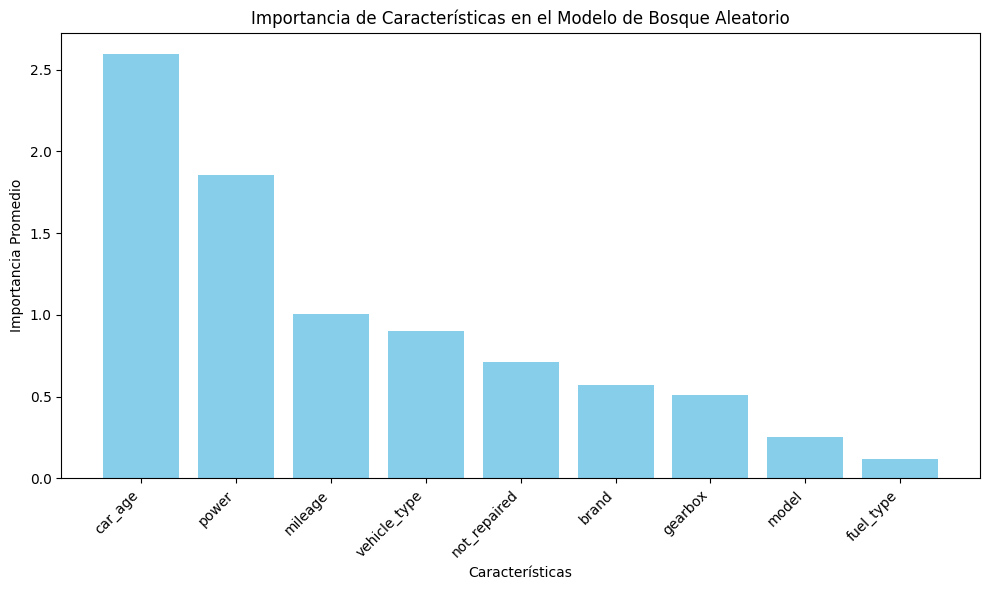


Importancia de Características:
car_age: 2.5950
power: 1.8583
mileage: 1.0083
vehicle_type: 0.9033
not_repaired: 0.7133
brand: 0.5733
gearbox: 0.5083
model: 0.2550
fuel_type: 0.1183


In [84]:
def calcular_importancia_caracteristicas(modelo_rf, caracteristicas):
    # Calcular importancia de características por árbol
    importancias = []
    for arbol in modelo_rf.arboles:
        importancia_arbol = calcular_importancia_recursiva(arbol.raiz)
        importancias.append(importancia_arbol)

    # Promediar importancias entre todos los árboles
    importancia_promedio = {}
    for caracteristica in caracteristicas:
        valores = [imp.get(caracteristica, 0) for imp in importancias]
        importancia_promedio[caracteristica] = np.mean(valores)

    # Ordenar de mayor a menor
    caracteristicas_ordenadas = sorted(
        importancia_promedio.items(),
        key=lambda x: x[1],
        reverse=True
    )

    # Visualización
    plt.figure(figsize=(10, 6))
    nombres = [x[0] for x in caracteristicas_ordenadas]
    valores = [x[1] for x in caracteristicas_ordenadas]
    plt.bar(nombres, valores, color='skyblue')
    plt.title('Importancia de Características en el Modelo de Bosque Aleatorio')
    plt.xlabel('Características')
    plt.ylabel('Importancia Promedio')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return dict(caracteristicas_ordenadas)

def calcular_importancia_recursiva(nodo, importancia=None, profundidad=0):
    if importancia is None:
        importancia = {}

    if not isinstance(nodo, tuple):
        return importancia

    pregunta, izquierda, derecha = nodo
    caracteristica = list(X.columns)[pregunta[0]]  # X debe ser tu conjunto de entrenamiento

    importancia[caracteristica] = importancia.get(caracteristica, 0) + 1 / (profundidad + 1)

    calcular_importancia_recursiva(izquierda, importancia, profundidad + 1)
    calcular_importancia_recursiva(derecha, importancia, profundidad + 1)

    return importancia

# Llamada a la función (ya entrenado el modelo_rf)
importancia_caracteristicas = calcular_importancia_caracteristicas(modelo_rf, X_train.columns)

# Mostrar en consola
print("\nImportancia de Características:")
for caracteristica, valor in importancia_caracteristicas.items():
    print(f"{caracteristica}: {valor:.4f}")


In [85]:
# Selección de las características más importantes
def seleccionar_top_features(importancia_caracteristicas, n_top=4):
    # Ordenar características por importancia
    caracteristicas_ordenadas = sorted(
        importancia_caracteristicas.items(),
        key=lambda x: x[1],
        reverse=True
    )

    # Seleccionar las n características más importantes
    top_features = [feature for feature, _ in caracteristicas_ordenadas[:n_top]]
    return top_features

# Obtener las top 4 características
top_features = seleccionar_top_features(importancia_caracteristicas)
print("Características más importantes seleccionadas:", top_features)

# Crear nuevo dataset solo con esas características
X_top = X[top_features]

# Dividir el dataset con las nuevas características
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Entrenar nuevo modelo usando solo top features
modelo_rf_top = BosqueAleatorio(n_arboles=10, max_depth=5)
modelo_rf_top.ajustar(X_train_top, y_train_top)

# Predecir sobre el conjunto de prueba
y_pred_top = modelo_rf_top.predecir(X_test_top)

# Calcular métricas
mse_top = np.mean((y_test_top - y_pred_top) ** 2)
rmse_top = np.sqrt(mse_top)
r2_top = 1 - (np.sum((y_test_top - y_pred_top) ** 2) / np.sum((y_test_top - np.mean(y_test_top)) ** 2))

print("\n📊 Resultados del modelo con características más importantes:")
print(f"🔹 MSE: {mse_top:.2f}")
print(f"🔹 RMSE: {rmse_top:.2f}")
print(f"🔹 R²: {r2_top:.4f}")

# Comparar con el modelo original
print("\n📈 Comparación del rendimiento del modelo:")
print(f"🔸 R² (modelo original): {r2:.4f}")
print(f"🔸 R² (modelo con top features): {r2_top:.4f}")


Características más importantes seleccionadas: ['car_age', 'power', 'mileage', 'vehicle_type']

📊 Resultados del modelo con características más importantes:
🔹 MSE: 6292850.63
🔹 RMSE: 2508.56
🔹 R²: 0.7353

📈 Comparación del rendimiento del modelo:
🔸 R² (modelo original): 0.7249
🔸 R² (modelo con top features): 0.7353
